In [64]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt

In [65]:
#Read data
df=pd.read_csv("https://raw.githubusercontent.com/farha-neu/cs7295/master/property_assesment.csv")
#ignoring tax-exempted properties
dd = df[(df['YR_BUILT'] > 0) & (df['GROSS_TAX'] > 0)]
dd = dd.groupby('YR_BUILT', as_index=False).agg({"GROSS_TAX" : "mean"})
dd['percent']= dd['GROSS_TAX'].pct_change()*100
x= dd['YR_BUILT']
y = dd['percent']

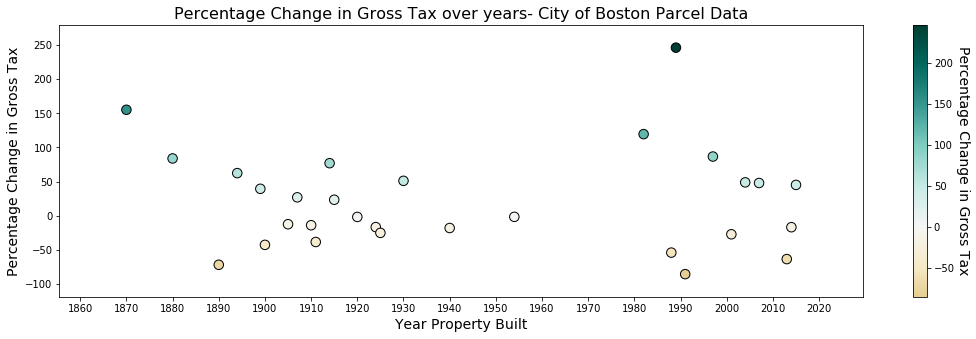

In [66]:
plt.figure(figsize=(18, 5))
ax = plt.subplot(211)
#create colormap
plot = plt.scatter(x,y, c=y, cmap='BrBG')
plt.clf()
cbar = plt.colorbar(plot)
cbar.set_clim(-250, 250)
#remove borders
ax.spines["top"].set_visible(False)       
ax.spines["right"].set_visible(False)  
ax.spines["bottom"].set_visible(False)       
ax.spines["left"].set_visible(False)  

#plot scatter plot
plt.margins(0.1)
plt.scatter(x,y,c=y, cmap = 'BrBG', s=90, edgecolors='black', vmin=-250, vmax=250)
#x-axis range
plt.xticks(np.arange(min(x), max(x)+10, 10.0))
#label axes
plt.xlabel('Year Property Built', fontsize=14)
plt.ylabel('Percentage Change in Gross Tax', fontsize=14)
plt.title('Percentage Change in Gross Tax over years- City of Boston Parcel Data',fontsize=16)

#label for colorbar
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Percentage Change in Gross Tax', rotation=270,fontsize=14)

plt.show()

In [67]:
#a. I have used scatter plot to depict percent change in gross tax from previous year to demonstrate 
# the use of diverging colormap. 
# Color channel and position are used to depict gross tax percentage change. This enables us to clearly
# differentiate years when tax rate increased or decreased from previous year. Axes are labeled and a title 
# is provided to help recall the message conveyed by graph.

In [68]:
#b. This visualization depicts percentage change in gross tax from previous year.
# The plot shows year on X-axis and percentage change in gross tax over Y-axis. Percentage change in gross tax has
# been double encoded by spatial position and color. There has been a fluctuation of gross-tax rate over years with
# the highest fluctuation seen in the year 1989.

In [69]:
#c. As percentage change in gross tax has a diverging point, I have picked colorblind safe diverging colormap('BrBG')
# from http://colorbrewer2.org. Here two saturated contrasting colors for the extremes of the data
# blend into a lighter mix of the two in the middle.
# I have considered zero as mid-range critical value for percentage change in gross tax. 